# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# 3 Observable Trends:
#
# 1. Max Temperature seems to decrease as the latitude either increases or decreases from the point of 0 Latitude,
# also known as the equator.
#
# 2. Humidity, wind speed, and cloudiness are not dependent on latitude.
#
# 3. There are far more colder Max Temperatures in the Northern Hemisphere than the Southern Hemisphere because it 
# is currently summer (12/06/2019) in the Southern Hemisphere.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=b05f5e20f9e2c655a402a37dfb85a157&units=imperial&q='

In [5]:
# Get weather data
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

In [6]:
# set up lists to hold reponse info
city_name = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []

record = 1

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    try:
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
        city_name.append(weather_json["name"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        city_record = weather_json["name"]
        
        print(f"Processing Record {record} | {city_record}")
        
        record = record + 1
        
    except:
        print("City not found. Skipping...")
    continue
    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 | Xining
Processing Record 2 | Hermanus
Processing Record 3 | Kaitangata
City not found. Skipping...
Processing Record 4 | Magadi
Processing Record 5 | Gwadar
City not found. Skipping...
Processing Record 6 | Provideniya
City not found. Skipping...
Processing Record 7 | Znamenskoye
Processing Record 8 | Deputatskiy
Processing Record 9 | Nanortalik
Processing Record 10 | Tiksi
City not found. Skipping...
Processing Record 11 | Takoradi
Processing Record 12 | Busselton
City not found. Skipping...
Processing Record 13 | Mataura
Processing Record 14 | Skelleftea
Processing Record 15 | Coihaique
Processing Record 16 | Panzhihua
Processing Record 17 | Cape Town
Processing Record 18 | Sambava
Processing Record 19 | Ushuaia
Processing Record 20 | Umm Lajj
Processing Record 21 | Saskylakh
Processing Record 22 | Chuy
Processing Record 23 | Cotonou
Processing Record 24 | Ponta do Sol
Processing Record 25 | Bouar
Processing Reco

Processing Record 218 | Udachnyy
Processing Record 219 | Mar del Plata
Processing Record 220 | Hofn
Processing Record 221 | Rio Grande
Processing Record 222 | Manggar
Processing Record 223 | Viedma
Processing Record 224 | Corozal
Processing Record 225 | Mardin
City not found. Skipping...
Processing Record 226 | Pisco
Processing Record 227 | Sampit
Processing Record 228 | Coquimbo
Processing Record 229 | San Jose
Processing Record 230 | Ponta Delgada
Processing Record 231 | Edson
Processing Record 232 | Riyadh
Processing Record 233 | Neepawa
Processing Record 234 | Vila
Processing Record 235 | Klaksvik
Processing Record 236 | Chokurdakh
Processing Record 237 | Port Moresby
Processing Record 238 | Maxixe
Processing Record 239 | Pevek
Processing Record 240 | Lasa
Processing Record 241 | Ribeira Grande
Processing Record 242 | Koosa
Processing Record 243 | Shubarkuduk
City not found. Skipping...
Processing Record 244 | Kutum
City not found. Skipping...
Processing Record 245 | Kapuskasing
Pr

Processing Record 447 | Myitkyina
Processing Record 448 | Yagodnoye
Processing Record 449 | Tautira
Processing Record 450 | Bonthe
City not found. Skipping...
Processing Record 451 | Hamilton
Processing Record 452 | Barentu
Processing Record 453 | Narsaq
Processing Record 454 | Mount Isa
Processing Record 455 | Podstepki
City not found. Skipping...
City not found. Skipping...
Processing Record 456 | Villa Florida
Processing Record 457 | Trairi
Processing Record 458 | Mtambile
Processing Record 459 | Zhangjiakou
Processing Record 460 | Saint-Augustin
Processing Record 461 | Vilhena
Processing Record 462 | Gat
Processing Record 463 | San Juan
City not found. Skipping...
Processing Record 464 | Port Hawkesbury
Processing Record 465 | Piltene
Processing Record 466 | Luanda
Processing Record 467 | Sovetskiy
Processing Record 468 | Zhongshu
Processing Record 469 | Tomino
Processing Record 470 | Sobolevo
City not found. Skipping...
Processing Record 471 | Christchurch
City not found. Skipping

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create dictionary to use for DataFrame
weather_dict = {
    "City": city_name,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Lat": lat,
    "Lng": lng,
    "Country": country,
    "Date": date
}

# Create DataFrame from dictionary
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Lat           532
Lng           532
Country       532
Date          532
dtype: int64

In [8]:
# Export data to csv and display
weather_data.to_csv('output_data_file')
weather_data.head()

,City,Max Temp,Humidity,Cloudiness,Wind Speed,Lat,Lng,Country,Date
0,Xining,13.62,49,0,6.26,36.62,101.77,CN,1575671214
1,Hermanus,64.00,94,0,20.22,-34.42,19.24,ZA,1575671214
2,Kaitangata,62.01,63,67,8.01,-46.28,169.85,NZ,1575671214
3,Magadi,60.80,100,40,3.36,12.96,77.22,IN,1575671214
4,Gwadar,77.70,53,1,5.93,25.12,62.33,PK,1575671214


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
# Convert Date to normal format
timestamp = 1575671214
date_time = datetime.fromtimestamp(timestamp)
date = date_time.strftime("%m/%d/%Y")

#### Latitude vs. Temperature Plot

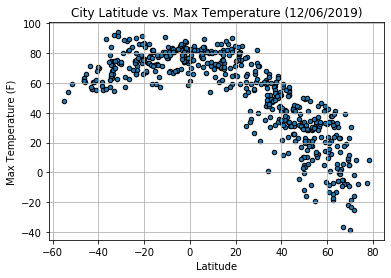

In [10]:
# Create scatter plot and save as .png
weather_data.plot.scatter(x='Lat', y='Max Temp', edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('lat_temp.png')

#### Latitude vs. Humidity Plot

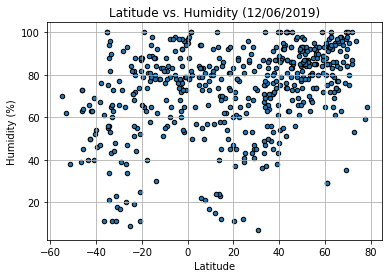

In [11]:
# Create scatter plot and save as .png
weather_data.plot.scatter(x='Lat', y='Humidity', edgecolors="black")
plt.title(f"Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('lat_humidity.png')

#### Latitude vs. Cloudiness Plot

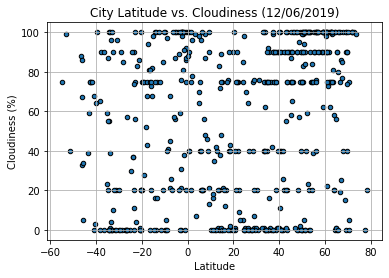

In [12]:
# Create scatter plot and save as .png
weather_data.plot.scatter(x='Lat', y='Cloudiness', edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('lat_clouds.png')

#### Latitude vs. Wind Speed Plot

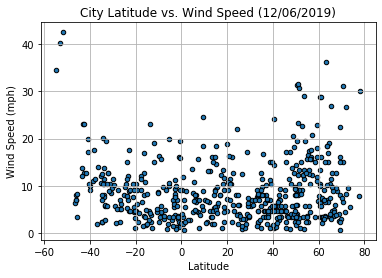

In [13]:
# Create scatter plot and save as .png
weather_data.plot.scatter(x='Lat', y='Wind Speed', edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('lat_wind.png')